In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [3]:
def get_hoH(a):
    Q = np.cbrt((27*a**2 + np.sqrt(729*a**4 + 6912*a**3))/2)
    S = np.sqrt(2*a + a**2/4 + (Q-12*a/Q)/3)/2
    q = a/8*(a**2+12*a+24)
    p = -3/8*a**2 - 3*a
    x1 = -a/4 - S + np.sqrt(-4*S**2 - 2*p + q/S)/2
    return x1

In [9]:
Q0     = 0#538
B0     = Q0/1026/3991*9.81*2e-4
H      = 50
M2     = 3e-8
dUg    = M2/1e-4*H
ustar2 = 0.147/1026
beta   = np.maximum(ustar2*np.cos(np.deg2rad(0))/dUg**2, 0) + B0*H/dUg**3
alpha  = 14**3*beta**2
get_hoH(alpha)

0.9143553321226818

In [14]:
np.sqrt(2/3)

0.816496580927726

In [17]:
0.147/1026*18e-8/1e-4*1026*3991/9.81/2e-4

538.2357798165137

In [14]:
0.147*3

0.44099999999999995

In [21]:
B0*H/dUg**3

0.0

In [48]:
# x = np.concatenate([-np.flip(np.logspace(-5,5)), np.logspace(-5,5)])
x = np.logspace(-5,2)
y = np.logspace(-5,2)
X,Y = np.meshgrid(x,y)
alpha = 14**3*(np.maximum(X,0) + Y)**2

get_hoH_vfunc = np.vectorize(get_hoH)
r = get_hoH_vfunc(alpha)
gsp = (X+Y)/2 - Y*r/2

In [44]:
gsp.min()

-97.65624499999831

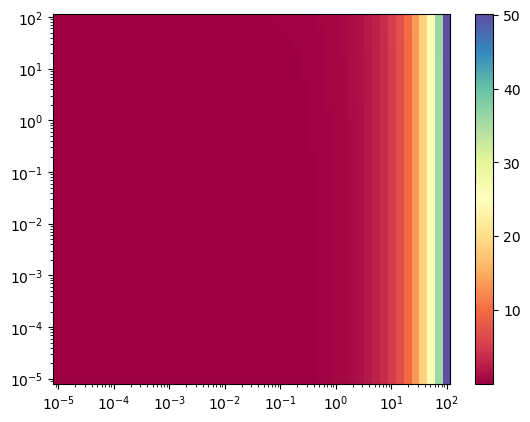

In [49]:
plt.close()

plt.figure()
plt.pcolormesh(x, y, gsp, cmap='Spectral')#, vmax=1000, vmin=-1000);
plt.colorbar()
plt.yscale('log')
plt.xscale('log')
# plt.xscale('symlog')